In [1]:
import backtester272 as bt
import pandas as pd
import numpy as np

# Load Datas

In [2]:
# Load data

weights = pd.read_excel('data/Master 272 - AM - Projet indices.xlsx', sheet_name='Composition MSCI World', skiprows=0, index_col=0, engine='openpyxl')
weights.fillna(0, inplace=True)
weights.index = pd.to_datetime(weights.index, format='%Y-%m-%d')

prices = pd.read_csv('data/msci_prices.csv', index_col=0)
prices.index = pd.to_datetime(prices.index, format='%Y-%m-%d')

prices = bt.Backtester.handle_missing_data(prices)

dict_universe = {}

for date in weights.index:
    # Sélectionner les colonnes non nulles pour cette date
    non_zero_columns = weights.loc[date][weights.loc[date] != 0].index
    valid_columns = [col for col in non_zero_columns if col in prices.columns]
    weights = weights.loc[:, weights.columns.isin(prices.columns)]
    weights.loc[date] = weights.loc[date] / weights.loc[date].sum()
    dict_universe[date.strftime('%Y-%m-%d')] = list(valid_columns)

benchmark = pd.read_csv('data/benchmark.csv', index_col=0, parse_dates=True).squeeze()

In [3]:
# wip = bt.Backtester(prices, dates_universe=dict_universe, benchmark_weights=weights)

# start_date = weights.index[0].strftime('%Y-%m-%d')
# end_date = weights.index[-1].strftime('%Y-%m-%d')

# global_params_to_retreive_bench = {
#     'start_date': start_date,
#     'end_date': end_date,
#     'freq': 30,
#     'window': 30,
#     'aum': 100,
#     'transaction_cost': 0
# }

# EW = wip.run(**global_params_to_retreive_bench, strategy=bt.EqualWeightStrategy())

# benchmark = EW.benchmark

In [4]:
wip = bt.Backtester(prices, dates_universe=dict_universe, benchmark_weights=weights)

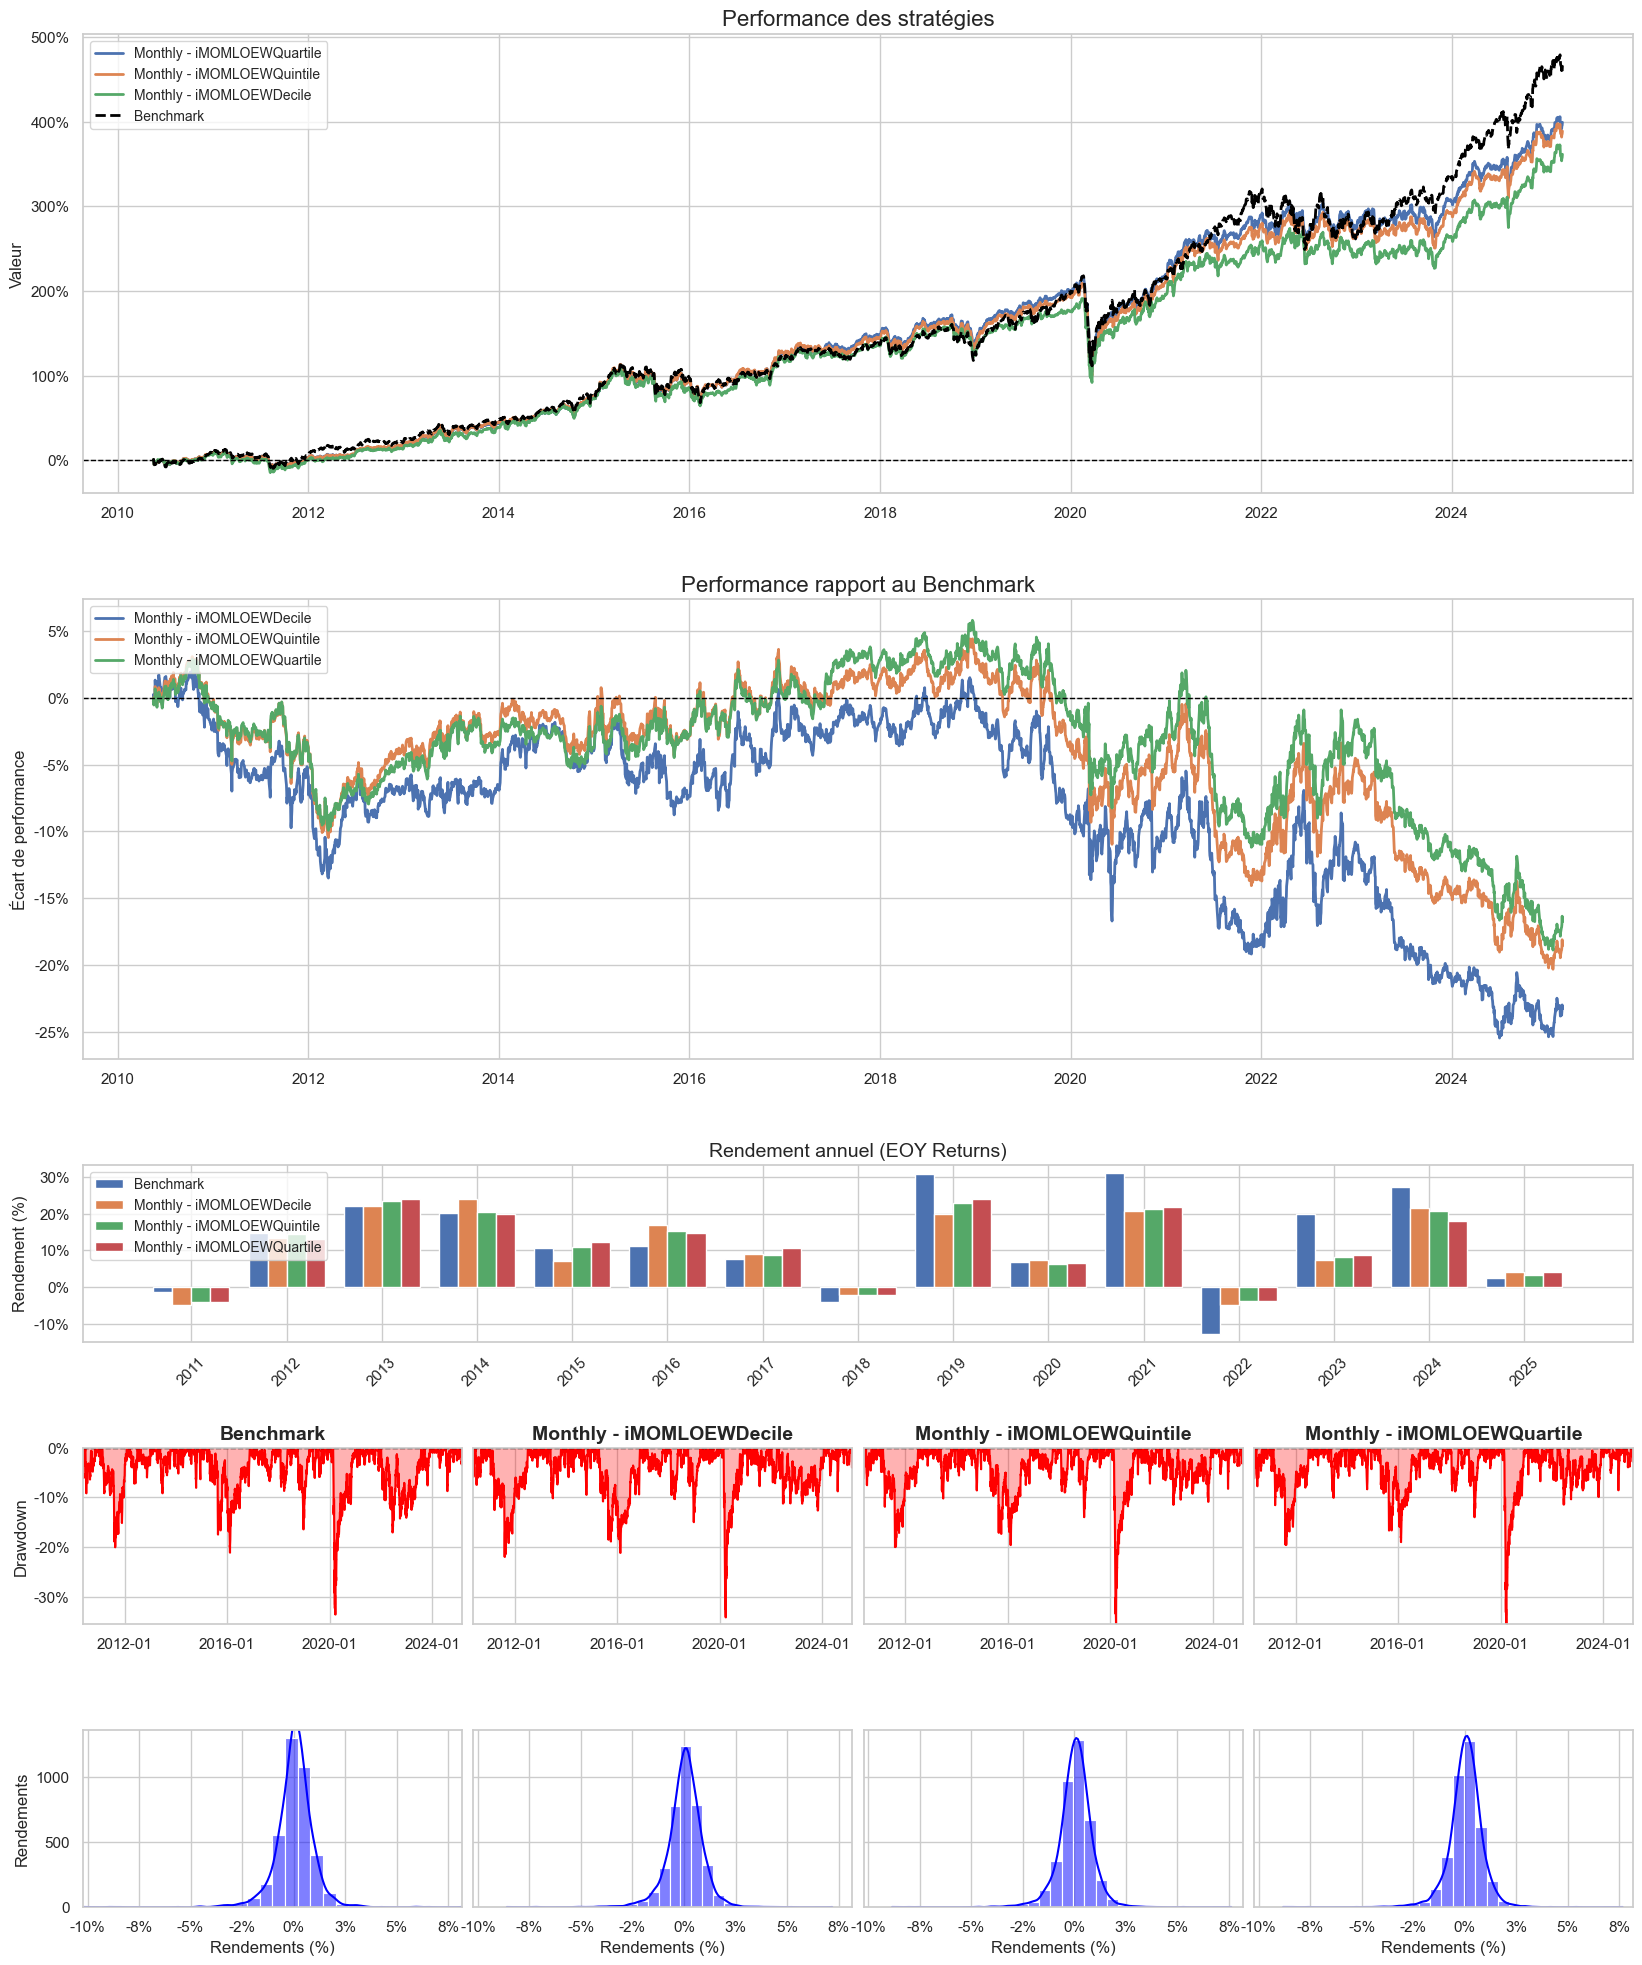

|                              | Benchmark   | Monthly - iMOMLOEWDecile   | Monthly - iMOMLOEWQuintile   | Monthly - iMOMLOEWQuartile   |
|:-----------------------------|:------------|:---------------------------|:-----------------------------|:-----------------------------|
| Performance                  | 466.86%     | 361.78%                    | 389.18%                      | 399.63%                      |
| CAGR                         | 12.21%      | 10.69%                     | 11.11%                       | 11.27%                       |
| Volatility                   | 14.54%      | 13.74%                     | 13.27%                       | 13.16%                       |
| Max Drawdown                 | -33.53%     | -34.10%                    | -35.33%                      | -35.52%                      |
| Sharpe Ratio                 | 0.87        | 0.81                       | 0.86                         | 0.88                         |
| Annualized Transactions Cost | 0

In [ ]:
start_date = weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params_monthly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 1,
    'window': (12 * 30) * (1 + 3),
    'aum': 100,
    'transaction_cost': 0
}

MiMOMLOEWDecile = wip.run(**global_params_monthly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.1, benchmark=benchmark), name='Monthly - iMOMLOEWDecile')
MiMOMLOEWQuintile = wip.run(**global_params_monthly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.2, benchmark=benchmark), name='Monthly - iMOMLOEWQuintile')
MiMOMLOEWQuartile = wip.run(**global_params_monthly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.25, benchmark=benchmark), name='Monthly - iMOMLOEWQuartile')

global_params_quarterly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 3,
    'window': (12 * 30) * (1 + 3),
    'aum': 100,
    'transaction_cost': 0
}

QiMOMLOEWDecile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.1, benchmark=benchmark), name='Quarterly - iMOMLOEWDecile')
QiMOMLOEWQuintile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.2, benchmark=benchmark), name='Quarterly - iMOMLOEWQuintile')
QiMOMLOEWQuartile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyIdiosyncraticMomentumStrategy(quantile=0.25, benchmark=benchmark), name='Quarterly - iMOMLOEWQuartile')

MiMOMLOEWDecile.compare(MiMOMLOEWQuintile, MiMOMLOEWQuartile)

In [ ]:
start_date = weights.index[0].strftime('%Y-%m-%d')
end_date = weights.index[-1].strftime('%Y-%m-%d')

global_params_monthly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 1,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}

global_params_quarterly = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 3,
    'window': 30 * 12,
    'aum': 100,
    'transaction_cost': 0
}


MLOEWDecile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.1), name='Monthly - LOEWDecile')
MLOEWQuintile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.2), name='Monthly - LOEWQuintile')
MLOEWQuartile = wip.run(**global_params_monthly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.25), name='Monthly - LOEWQuartile')

QLOEWDecile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.1), name='Quarterly - LOEWDecile')
QLOEWQuintile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.2), name='Quarterly - LOEWQuintile')
QLOEWQuartile = wip.run(**global_params_quarterly, strategy=bt.LongOnlyMomentumStrategy(quantile=0.25), name='Quarterly - LOEWQuartile')


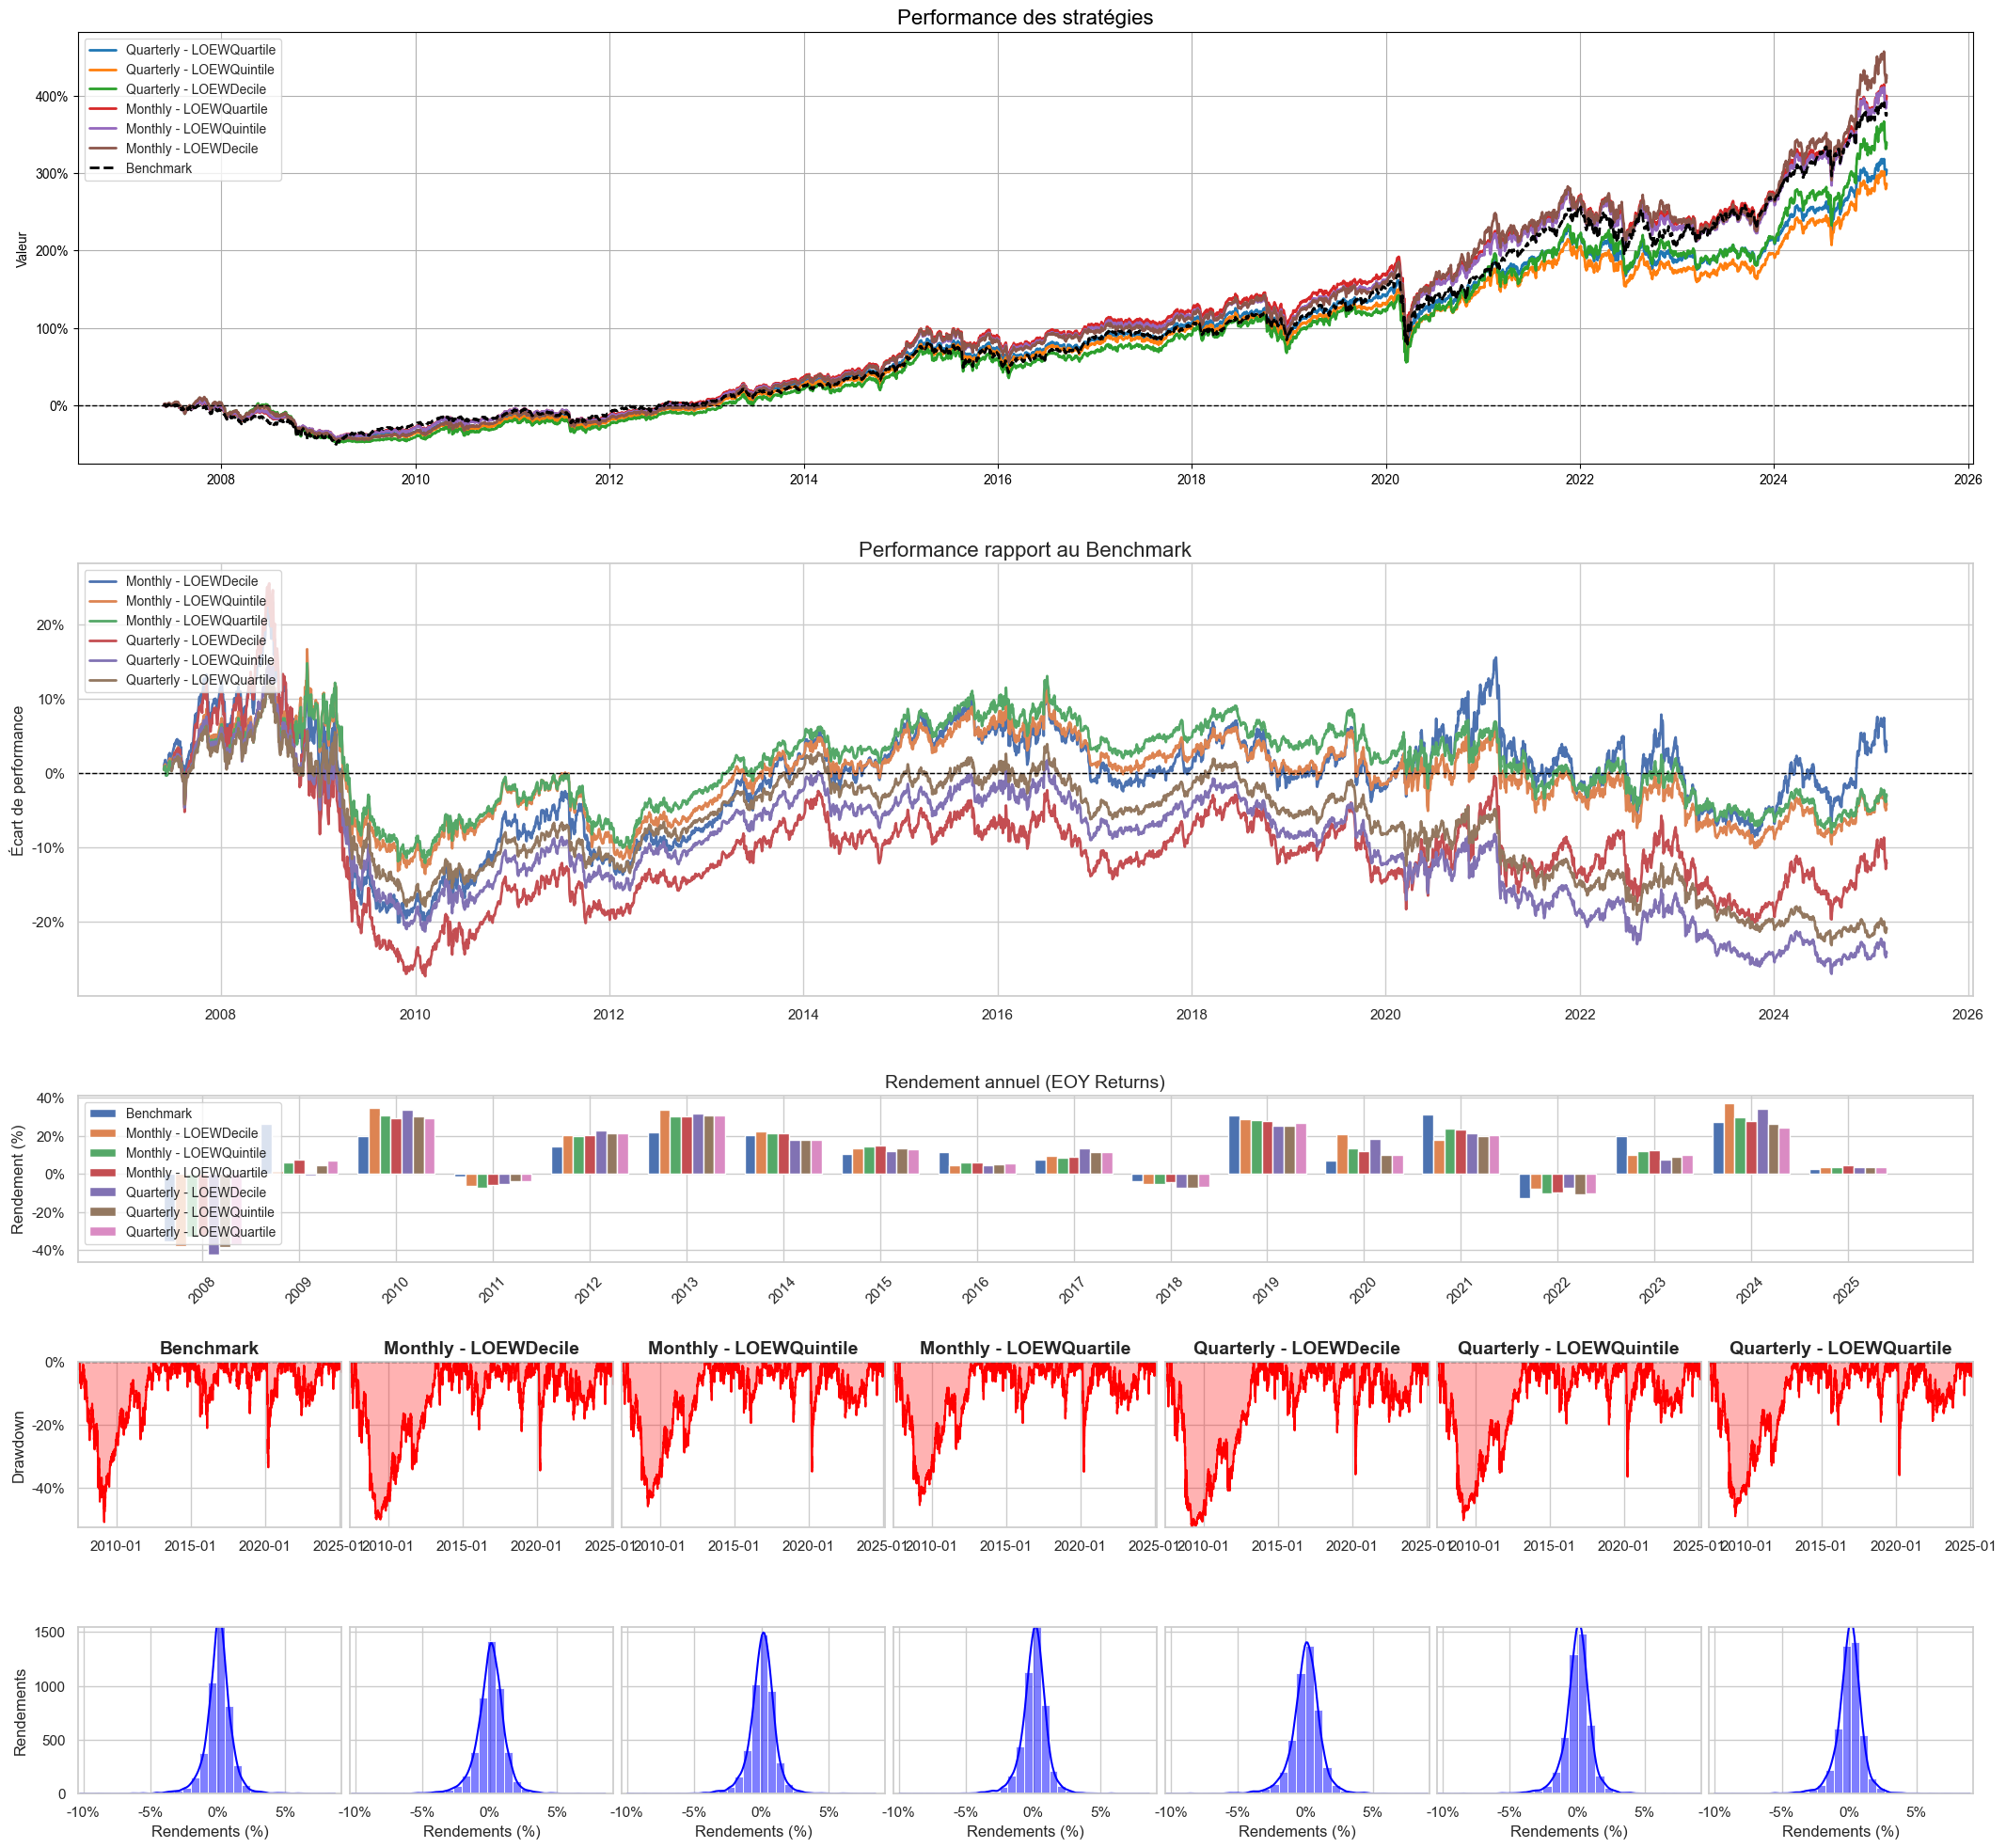

|                              | Benchmark   | Monthly - LOEWDecile   | Monthly - LOEWQuintile   | Monthly - LOEWQuartile   | Quarterly - LOEWDecile   | Quarterly - LOEWQuintile   | Quarterly - LOEWQuartile   |
|:-----------------------------|:------------|:-----------------------|:-------------------------|:-------------------------|:-------------------------|:---------------------------|:---------------------------|
| Performance                  | 380.15%     | 426.40%                | 392.38%                  | 399.49%                  | 339.41%                  | 286.16%                    | 304.18%                    |
| CAGR                         | 9.07%       | 9.63%                  | 9.22%                    | 9.31%                    | 8.58%                    | 7.80%                      | 8.08%                      |
| Volatility                   | 16.03%      | 17.21%                 | 15.52%                   | 15.12%                   | 17.78%                   | 15.

In [5]:
MLOEWDecile.compare(MLOEWQuintile, MLOEWQuartile, QLOEWDecile, QLOEWQuintile, QLOEWQuartile)

c:\Users\jules\Desktop\am-project-msci-factors\backtester272\Result.py:161: RuntimeWarning: invalid value encountered in scalar divide
  return excess_returns.mean() / excess_returns.std() * (self.periods_freq(prices) ** 0.5)
c:\Users\jules\Desktop\am-project-msci-factors\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


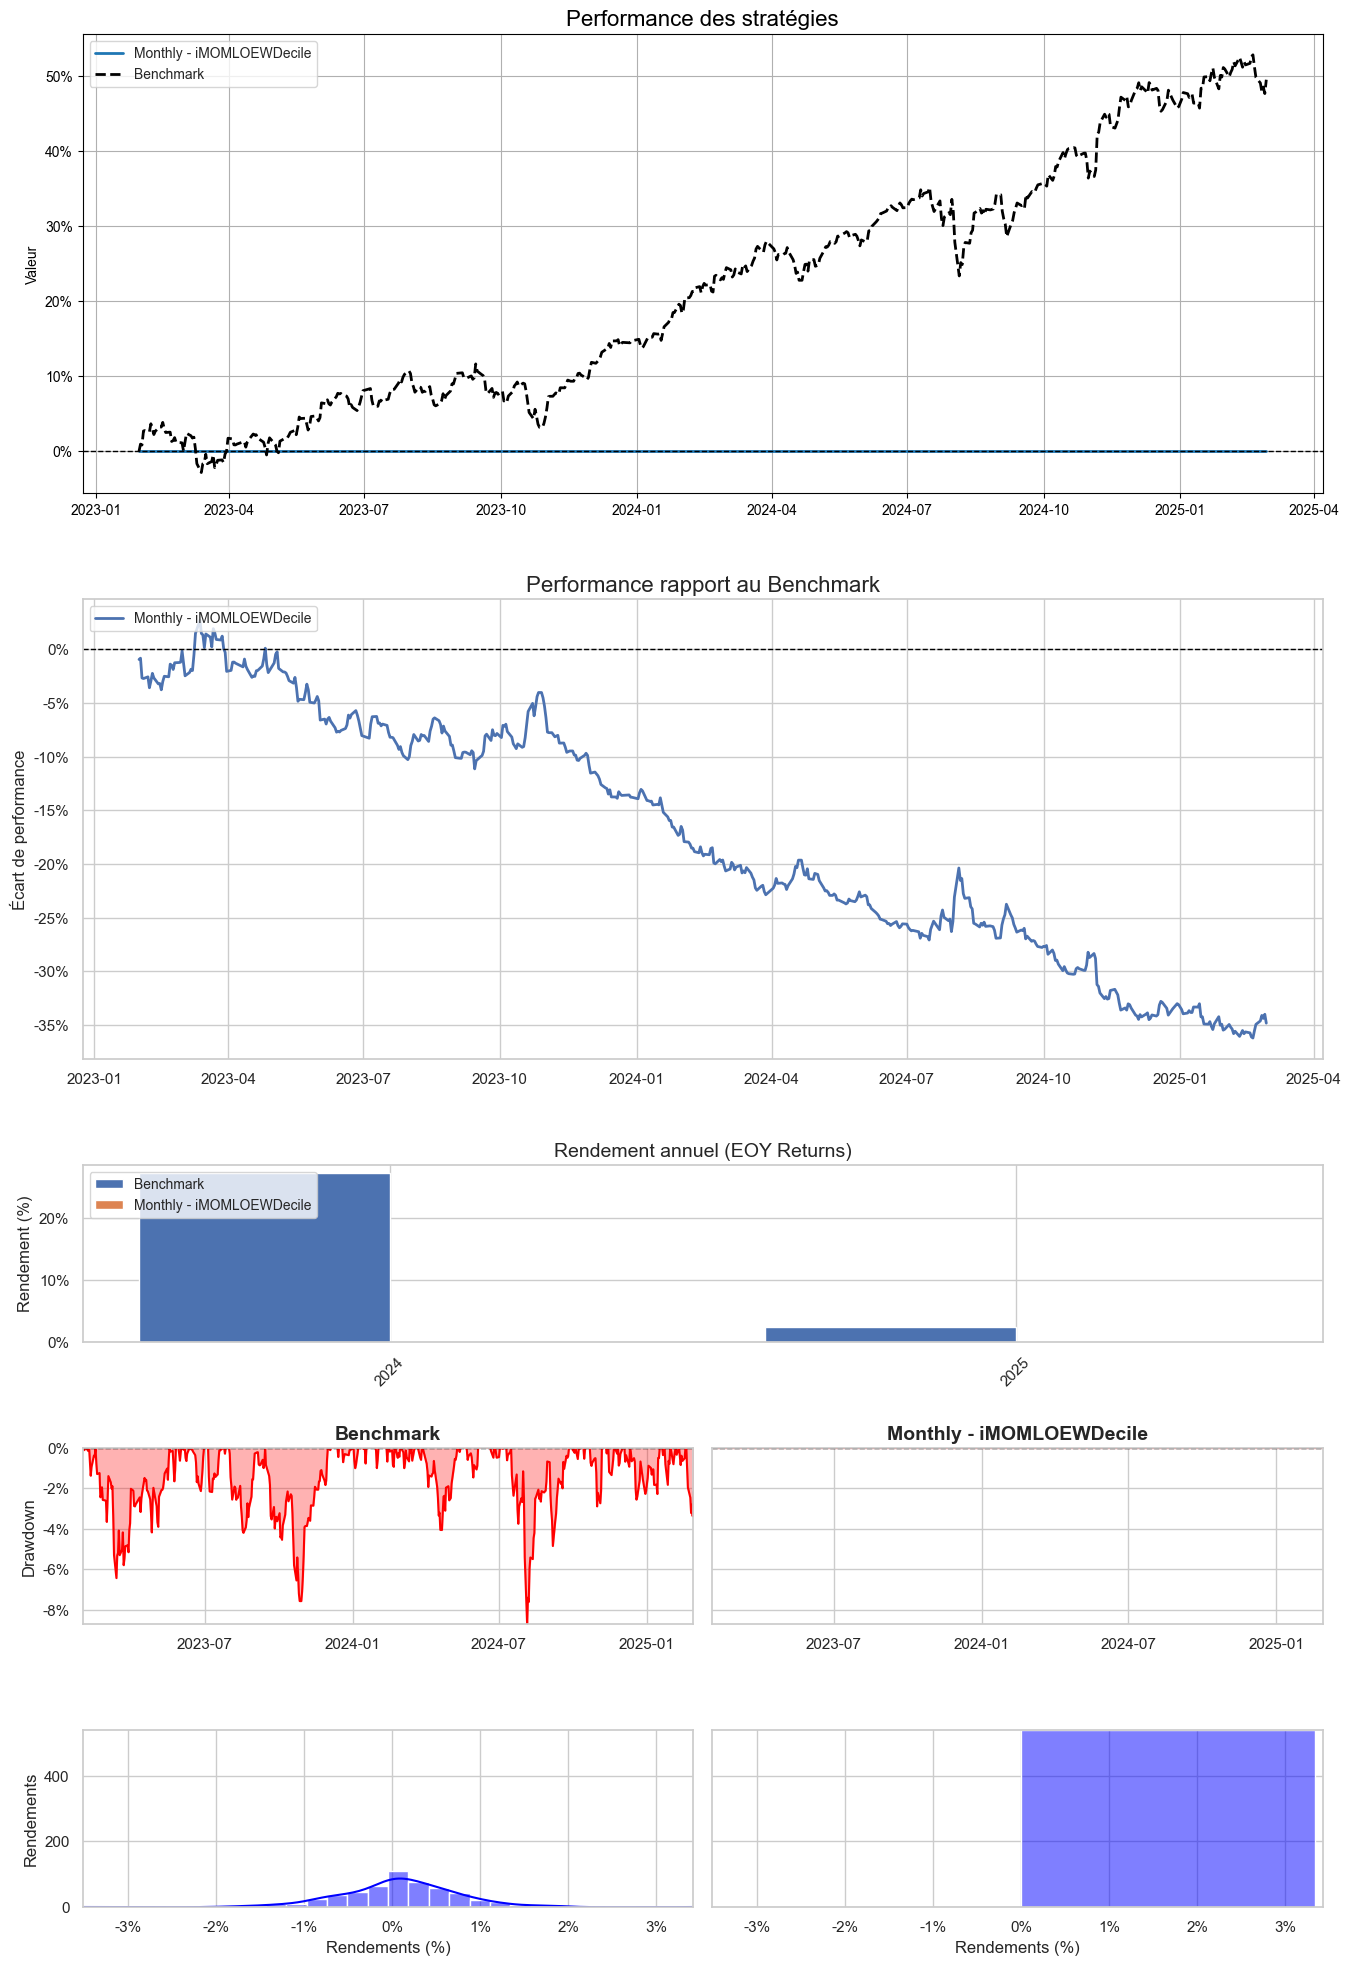

|                              | Benchmark   | Monthly - iMOMLOEWDecile   |
|:-----------------------------|:------------|:---------------------------|
| Performance                  | 49.56%      | 0.00%                      |
| CAGR                         | 20.75%      | 0.00%                      |
| Volatility                   | 10.87%      | 0.00%                      |
| Max Drawdown                 | -8.73%      | 0.00%                      |
| Sharpe Ratio                 | 1.79        | nan                        |
| Annualized Transactions Cost | 0.00%       | 0.00%                      |
| Tracking Error               | 0.0         | 10.87%                     |


In [5]:
MiMOMLOEWDecile.visualize()

In [11]:
# En registre en pikle MiMOMLOEWDecile
import pickle

with open('MiMOMLOEWDecile.pickle', 'wb') as f:
    pickle.dump(MiMOMLOEWDecile, f)

In [12]:
# Load le pickle
with open('MiMOMLOEWDecile.pickle', 'rb') as f:
    loaded = pickle.load(f)

/Users/julesmourgues/Documents/Cours/Master Dauphine/AM Comportementale/AM 3/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


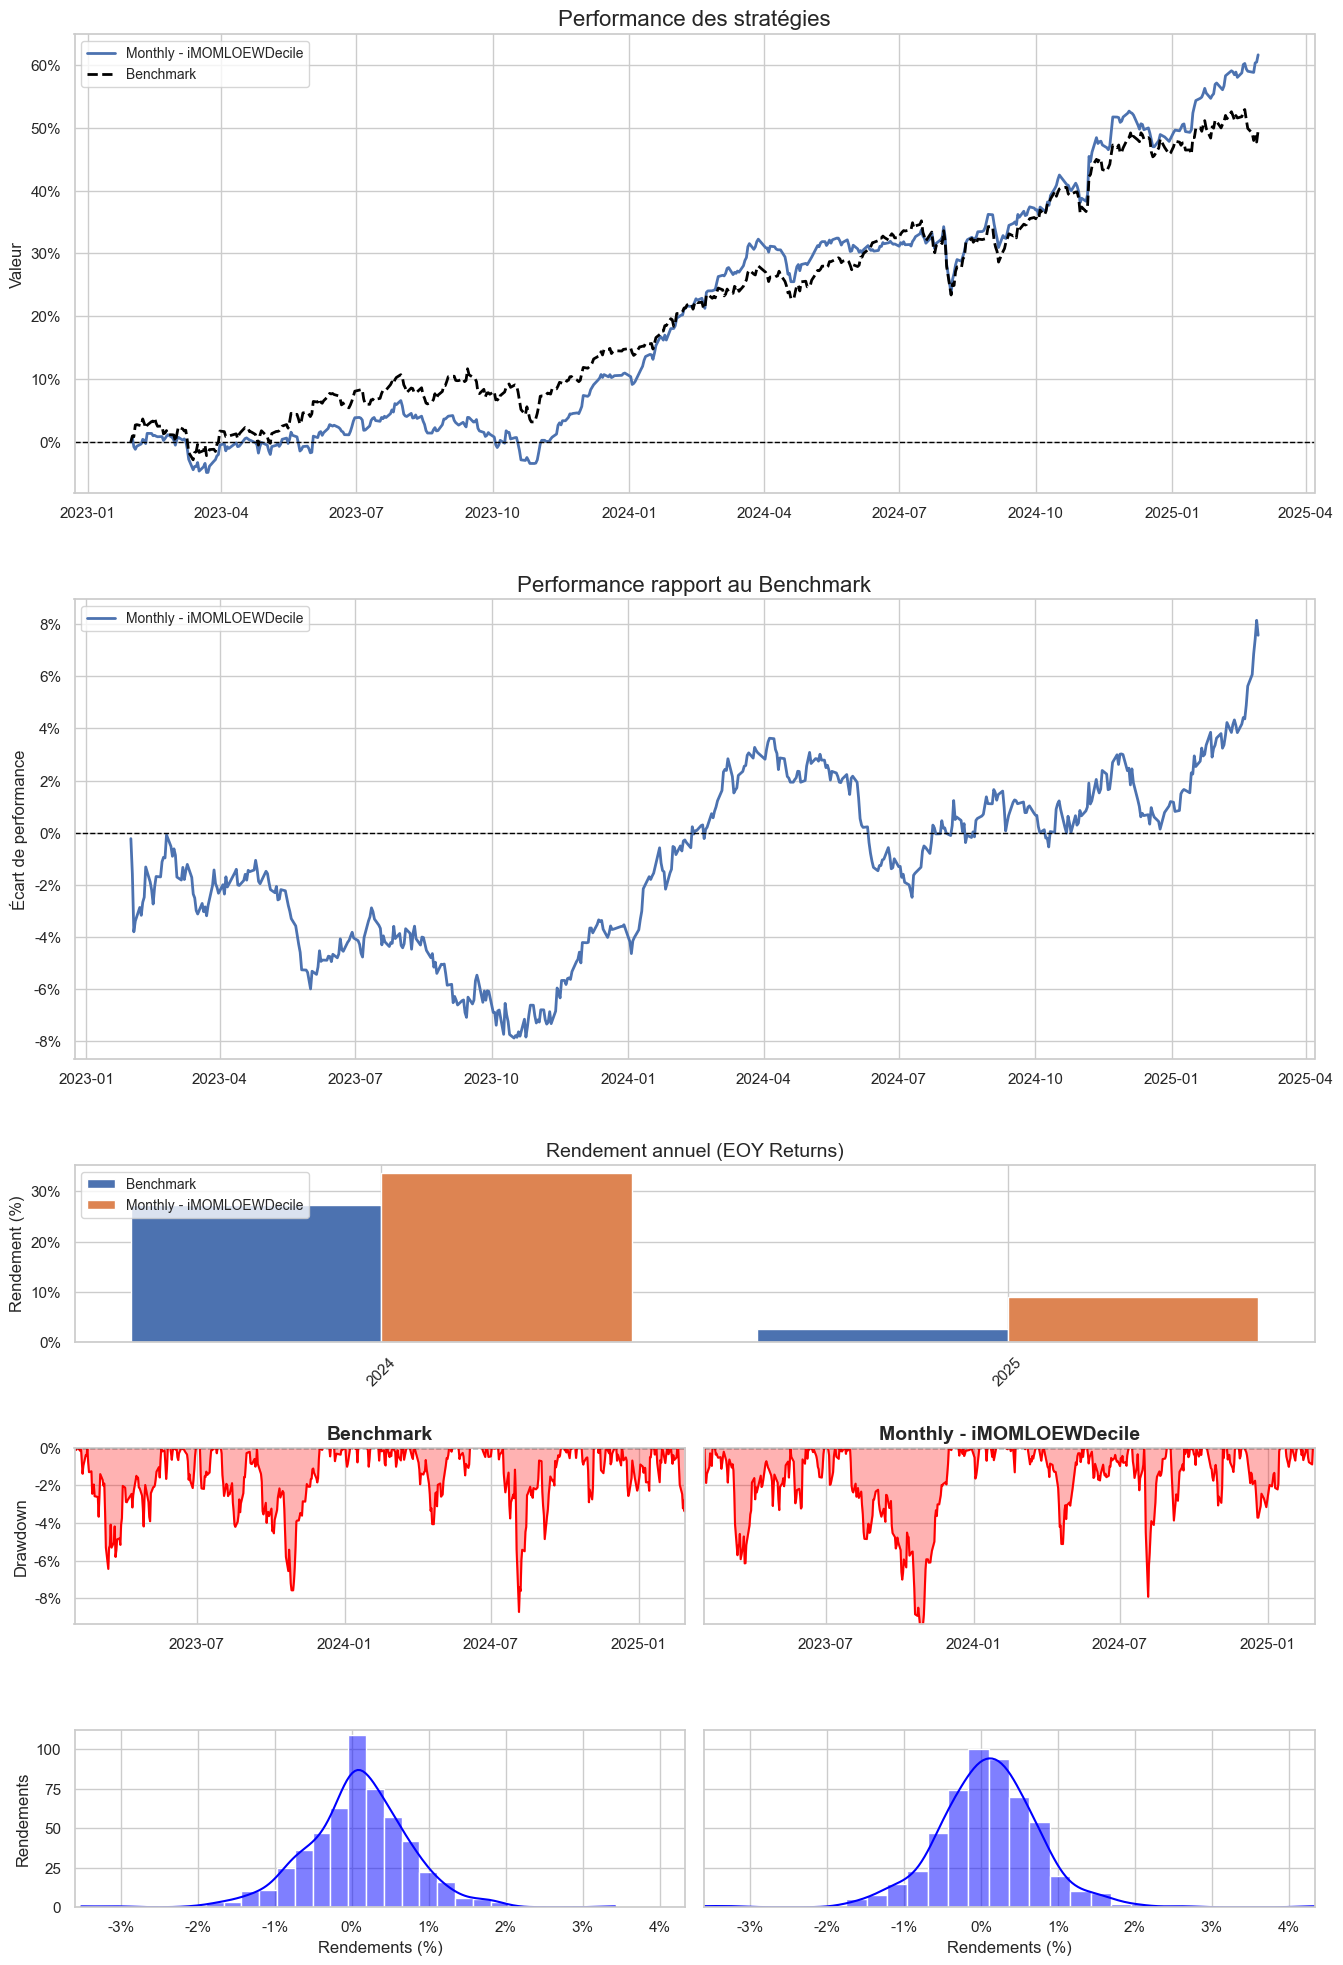

|                              | Benchmark   | Monthly - iMOMLOEWDecile   |
|:-----------------------------|:------------|:---------------------------|
| Performance                  | 49.56%      | 61.59%                     |
| CAGR                         | 20.75%      | 25.21%                     |
| Volatility                   | 10.87%      | 10.87%                     |
| Max Drawdown                 | -8.73%      | -9.39%                     |
| Sharpe Ratio                 | 1.79        | 2.13                       |
| Annualized Transactions Cost | 0.00%       | 0.00%                      |
| Tracking Error               | 0.0         | 6.41%                      |


In [13]:
loaded.visualize()